In [2]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-02-06 13:59:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.002s  

2019-02-06 13:59:07 (15.2 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [4]:
import pandas as pd

In [5]:
Data=pd.read_csv("Cust_Segmentation.csv")

In [6]:
Data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [74]:
#As you can see address is categorical variable so we will have to remove it
Data1 = Data.drop('Address', axis=1)
Data1.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
a = Data1[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']] .values  #.astype(float)
a

array([[ 41.   ,   2.   ,   6.   , ...,   0.124,   1.073,   6.3  ],
       [ 47.   ,   1.   ,  26.   , ...,   4.582,   8.218,  12.8  ],
       [ 33.   ,   2.   ,  10.   , ...,   6.111,   5.802,  20.9  ],
       ..., 
       [ 25.   ,   4.   ,   0.   , ...,   2.802,   3.21 ,  33.4  ],
       [ 32.   ,   1.   ,  12.   , ...,   0.116,   0.696,   2.9  ],
       [ 52.   ,   1.   ,  16.   , ...,   1.866,   3.638,   8.6  ]])

In [14]:
y = Data1['Defaulted'].values
y[0:10]



array([  0.,   0.,   1.,   0.,   0.,  nan,   0.,   0.,  nan,   0.])

In [15]:
# As you ca see there are some Nans present in the defaulted column in the data set so we need to convert it to a numerical value 
import numpy as np
y = np.nan_to_num(y)
y[0:10]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [16]:
# Since we are using the different classification models so it is bettrer to normalizing the data set-
from sklearn.preprocessing import StandardScaler
a = np.nan_to_num(a)
x = StandardScaler().fit_transform(a)

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ..., 
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

In [17]:
Data1['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [21]:
#Train and Test Split-
#We will train our model on the 80% of the data and test it on the rest 20% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (680, 7) (680,)
Test set: (170, 7) (170,)


In [22]:
# KNN-
from sklearn.neighbors import KNeighborsClassifier
# Lets take k=5
k=5
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) 
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
yhat = knn.predict(x_test)
yhat[0:5]

array([ 0.,  0.,  0.,  0.,  1.])

In [109]:
#Accuracy evaluation
#jaccard_similarity_score function
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.833823529412
Test set Accuracy:  0.811764705882


In [40]:
# We can calculate accuracy for different values of K
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx = [];
for n in range(1,ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.75294118,  0.81176471,  0.79411765,  0.81176471,  0.82352941,
        0.82941176,  0.82352941,  0.81764706,  0.81176471])

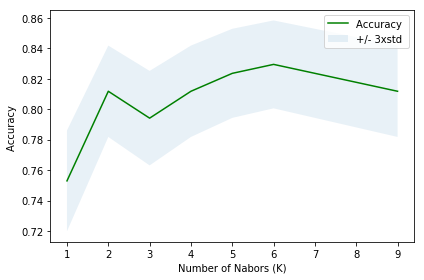

In [41]:
#Ploting model accuracy with different value of K
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.829411764706 with k= 6


In [98]:
#Decision Trees_
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
DT.fit(x_train,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
yhat_DT = DT.predict(x_test)
yhat_DT[0:5]

array([ 0.,  0.,  0.,  0.,  0.])

In [103]:
y_test[0:5]

array([ 0.,  0.,  0.,  0.,  0.])

In [88]:
#Accuracy Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,yhat_DT))

DecisionTrees's Accuracy:  0.788235294118


In [96]:
# With maximum depth=4 the accuracy is 0.788235294118

In [97]:
#Logistic Regression-


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(x_train,y_train)
LR
#liblinear is numerical optimizer to find the parameters.
#C parameter indicates inverse of regularization strength. Regularization is a technique used to solve the overfitting problem. Smaller values of C specify stronger regularization.

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
yhat_LR = LR.predict(x_test)
yhat_LR

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [154]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[ 0.83,  0.17],
       [ 0.93,  0.07],
       [ 0.85,  0.15],
       [ 0.87,  0.13],
       [ 0.27,  0.73],
       [ 0.56,  0.44],
       [ 0.94,  0.06],
       [ 0.44,  0.56],
       [ 0.61,  0.39],
       [ 0.87,  0.13],
       [ 0.86,  0.14],
       [ 0.8 ,  0.2 ],
       [ 0.71,  0.29],
       [ 0.77,  0.23],
       [ 0.53,  0.47],
       [ 0.63,  0.37],
       [ 0.95,  0.05],
       [ 0.93,  0.07],
       [ 0.84,  0.16],
       [ 0.66,  0.34],
       [ 0.81,  0.19],
       [ 0.65,  0.35],
       [ 0.84,  0.16],
       [ 0.86,  0.14],
       [ 0.94,  0.06],
       [ 0.65,  0.35],
       [ 0.76,  0.24],
       [ 0.74,  0.26],
       [ 0.71,  0.29],
       [ 0.6 ,  0.4 ],
       [ 0.87,  0.13],
       [ 0.75,  0.25],
       [ 0.81,  0.19],
       [ 0.62,  0.38],
       [ 0.93,  0.07],
       [ 0.92,  0.08],
       [ 0.93,  0.07],
       [ 0.69,  0.31],
       [ 0.76,  0.24],
       [ 0.84,  0.16],
       [ 0.21,  0.79],
       [ 0.8 ,  0.2 ],
       [ 0.86,  0.14],
       [ 0.

In [155]:
#The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)

In [156]:
#Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)


0.8294117647058824

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LR, labels=[1,0]))

[[  7  21]
 [  8 134]]


Confusion matrix, without normalization
[[  7  21]
 [  8 134]]


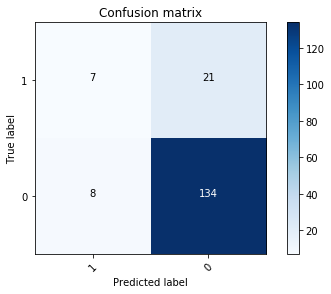

In [192]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [149]:
# F1 Score
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_LR))

             precision    recall  f1-score   support

        0.0       0.86      0.94      0.90       142
        1.0       0.47      0.25      0.33        28

avg / total       0.80      0.83      0.81       170



In [116]:
#Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)#
#Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)
#F1 score is the harmonic average of the precision and recall.
#F1-score for both labels-> 0.79. But for label 1 f1 score is very less which is very much evident by the confusion matrix.

In [117]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47663674763273339

In [165]:
#We will perform the same analysis again by using different numerical optimizer to see whether we get lower value of log loss or not. For example 'newton-cg'.
LR = LogisticRegression(C=0.1, solver='newton-cg').fit(x_train,y_train)
LR
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)
yhat_prob = LR.predict_proba(x_test)
yhat_LR = LR.predict(x_test)

In [166]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat_LR))

             precision    recall  f1-score   support

        0.0       0.86      0.94      0.90       142
        1.0       0.47      0.25      0.33        28

avg / total       0.80      0.83      0.81       170



In [167]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.39291713877698137

In [122]:
# We get lower value of the log loss by using 'newton-cg' instead of 'liblinear' 

In [206]:
#Support Vector Machine-

In [187]:
from sklearn import svm
#We are using linear kernal function
Svm = svm.SVC(kernel='linear')
Svm.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [189]:
yhat_svm = Svm.predict(x_test)
yhat_svm [0:5]

array([ 0.,  0.,  0.,  0.,  1.])

In [190]:
#Accuracy Evaluation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

        0.0       0.85      0.94      0.89       142
        1.0       0.36      0.18      0.24        28

avg / total       0.77      0.81      0.78       170

Confusion matrix, without normalization
[[133   9]
 [ 23   5]]


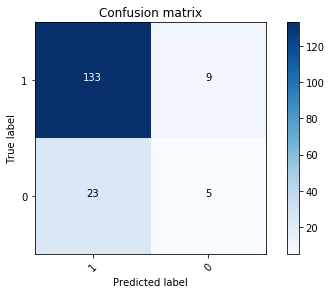

In [193]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [194]:
#F1 Score->
f1_score(y_test, yhat_svm, average='weighted') 

0.78481379128832729

In [201]:
#Jaccard Index->
jaccard_similarity_score(y_test, yhat_svm)

0.81176470588235294